In [18]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py as h
import astropy.io.fits as pf
import numpy as np
import healpy as hp
from astropy import units as u
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.constants as constants
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
import os
import sys
from scipy.interpolate import interp1d
from scipy import integrate
import treecorr
import kmeans_radec

%matplotlib inline

here
here


IOError: /global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l2_s4/mean_JK_gt_boosted not found.

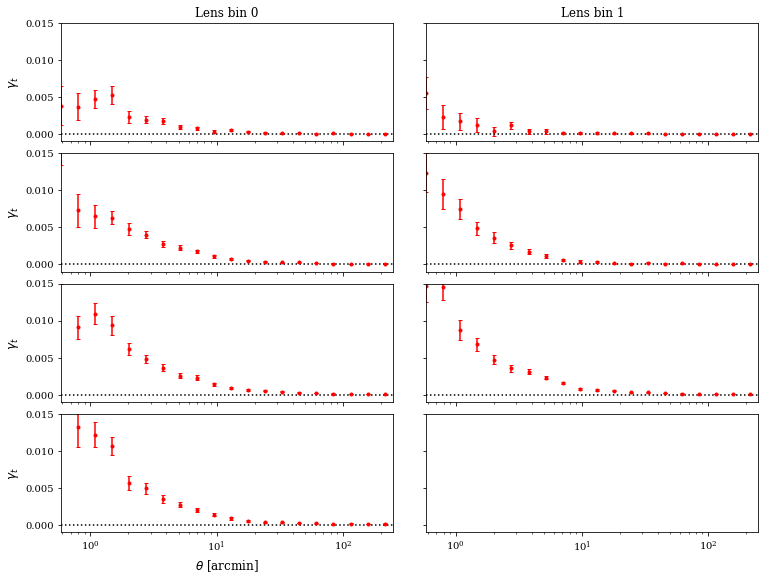

In [90]:
# read in the gt corrected, for each lens bin (2, later 4) and from each source bin. Plot. 

plt.rc("text", usetex=False)
plt.rc("font", family="serif")
#cmap = viridis
nlens=2
nsource=4

fig, ax = plt.subplots(4,2,figsize=(12.5, 9.375),sharey=True,sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
c1 = 'red'

for l in range(0, nlens):
    for s in range(nsource):

        path = "/global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l%d_s%d/" % (l+1,s+1)
        
        th, gt_boosted, err_gt_boosted = np.loadtxt(path +"mean_JK_gt_boosted", unpack=True)
        ax[s][l].axhline(y=0, ls=":", color="k", alpha=1)
        ax[s][l].errorbar(th, gt_boosted, err_gt_boosted, fmt=".", color=c1, mec=c1, capsize=2)
        ax[s][l].set_xscale("log")
        ax[s][l].set_xlim(0,250)
        ax[s][l].set_ylim(-0.001,0.015)
        #ax[s][l].xaxis.set_major_formatter(plt.ticker.FormatStrFormatter("$%0.0f$"))
        #ax[s][l].tick_params(axis="both", which="major", labelsize="larger")
        #ax[s][l].tick_params(axis="both", which="minor", labelsize="larger")

        if s == 3:
            ax[s][l].set_xlabel(r"$\theta$ [arcmin]", size="larger")
        if l == 0:
            ax[s][l].set_ylabel(r"$\gamma_t$",size="larger",linespacing=3,)
        if s == 0:
            ax[s][l].set_title("Lens bin %d" %l, size="larger")
            print("here")
plt.savefig('gammat.pdf')
plt.show()

In [2]:
print("here")

here


IOError: /global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l2_s4/boost_factor not found.

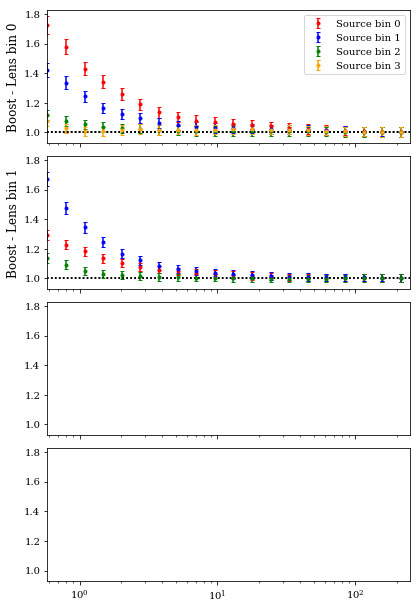

In [22]:
# Plot boost for each
nlens=2
nsource=4

fig, ax = plt.subplots(4,figsize=(6.5, 10.5),sharey=True,sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
c1 = ['red','blue','green','orange']

for l in range(0, nlens):
    for s in range(nsource):

        path = "/global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l%d_s%d/" % (l+1,s+1)
        
        th, gt_boosted, err_gt_boosted = np.loadtxt(path +"boost_factor", unpack=True)
        ax[l].axhline(y=1, ls=":", color="k", alpha=1)
        ax[l].errorbar(th, gt_boosted, err_gt_boosted, fmt=".", color=c1[s], mec=c1[s], capsize=2,label='Source bin %d' %s)
        ax[l].set_xscale("log")
        ax[l].set_xlim(0,250)
        #ax[s][l].xaxis.set_major_formatter(plt.ticker.FormatStrFormatter("$%0.0f$"))
        #ax[s][l].tick_params(axis="both", which="major", labelsize="larger")
        #ax[s][l].tick_params(axis="both", which="minor", labelsize="larger")
        if l == 0:
            ax[l].legend()
        if l == 3:
            ax[l].set_xlabel(r"$\theta$ [arcmin]", size="larger")
        ax[l].set_ylabel(r"Boost - Lens bin %d" %l,size="larger",linespacing=3,)

plt.savefig('boost.pdf')
plt.show()

here
here


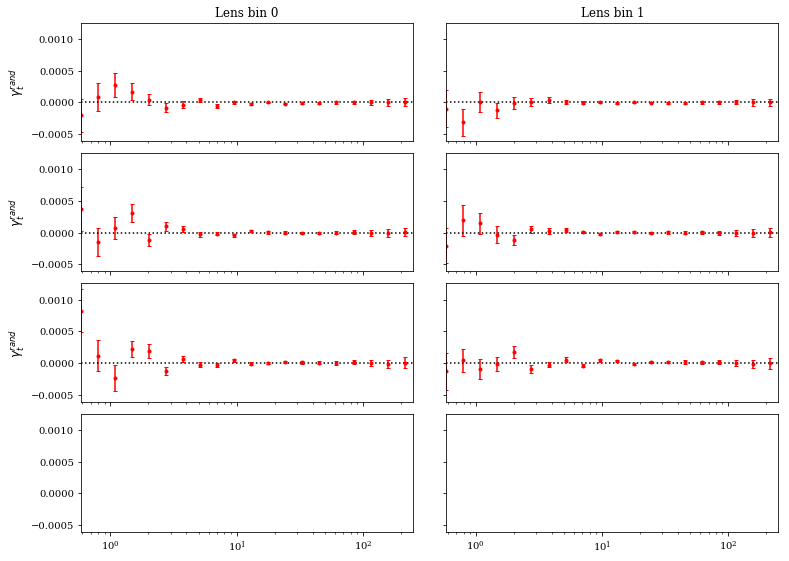

In [6]:
# Plot random for each
nlens=2
nsource=3

fig, ax = plt.subplots(4,2,figsize=(12.5, 9.375),sharey=True,sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
c1 = 'red'

for l in range(0, nlens):
    for s in range(nsource):

        path = "/global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l%d_s%d/" % (l+1,s+1)
        
        th, gt_boosted, err_gt_boosted = np.loadtxt(path +"randoms", unpack=True)
        ax[s][l].axhline(y=0, ls=":", color="k", alpha=1)
        ax[s][l].errorbar(th, gt_boosted, err_gt_boosted, fmt=".", color=c1, mec=c1, capsize=2)
        ax[s][l].set_xscale("log")
        ax[s][l].set_xlim(0,250)
        #ax[s][l].xaxis.set_major_formatter(plt.ticker.FormatStrFormatter("$%0.0f$"))
        #ax[s][l].tick_params(axis="both", which="major", labelsize="larger")
        #ax[s][l].tick_params(axis="both", which="minor", labelsize="larger")

        if s == 3:
            ax[s][l].set_xlabel(r"$\theta$ [arcmin]", size="larger")
        if l == 0:
            ax[s][l].set_ylabel(r"$\gamma_t^{rand}$",size="larger",linespacing=3,)
        if s == 0:
            ax[s][l].set_title("Lens bin %d" %l, size="larger")
            print("here")
plt.savefig('random.pdf')
plt.show()

In [53]:
# Convert to DS
def sigma_crit_inv(zl, z):
    cosmology = FlatLambdaCDM(H0=100, Om0=0.27)
    prefac = (4. * np.pi * constants.G / (constants.c**2.)).to(u.pc / u.Msun)
    #print(prefac)
    #zl = 0.2 #get mean zl
    #z = 0.336 #0.521, 0.742, 0.964
    Ds = cosmo.angular_diameter_distance(z).to(u.pc)
    Dl = cosmo.angular_diameter_distance(zl).to(u.pc)
    Dls = cosmo.angular_diameter_distance_z1z2(zl, z).to(u.pc)
    #print(Ds)
    val = prefac * Dl * Dls / Ds
    resval = np.max((0. , val.value))
    return resval
    

In [19]:
import h5py
main_file_path = "/project/projectdirs/des/www/y3_cats/Y3_mastercat_02_05_21.h5"
main_file = h5py.File(main_file_path, mode = 'r')
zlows = main_file["catalog/sompz/pzdata/zlow"][:]
zhighs = main_file["catalog/sompz/pzdata/zhigh"][:]
zcens = zlows + (zhighs - zlows) / 2.
zcens = zcens[:300]
# zedges = np.concatenate((zlows[:300],  [zhighs[299],]))

source_bins = [
    main_file["catalog/sompz/pzdata/bin0"][:],
    main_file["catalog/sompz/pzdata/bin1"][:],
    main_file["catalog/sompz/pzdata/bin2"][:],
    main_file["catalog/sompz/pzdata/bin3"][:],
]

zlens_grid_edges = np.linspace(0.00, 0.7, 71)
zlens_grid = zlens_grid_edges[:-1] + np.diff(zlens_grid_edges) / 2.

In [51]:
sigma_crit_inv(0.23, 0.5)

6.01353090097e-13 pc / solMass
1259083597.29 pc


0.00023080155287722053

In [54]:
scritinv_tab = np.zeros(shape=(len(zlens_grid), len(zcens)))
for i, zlens in enumerate(zlens_grid):
    if i%10==0:
        print(i)
    for j, zsource in enumerate(zcens):
        scritinv_tab[i,j] = sigma_crit_inv(zlens, zsource)
scritinv_tab

0
10
20
30
40
50
60


array([[0.00000000e+00, 6.39212473e-06, 9.58813986e-06, ...,
        1.27554564e-05, 1.27555226e-05, 1.27555883e-05],
       [0.00000000e+00, 0.00000000e+00, 9.45058653e-06, ...,
        3.75480379e-05, 3.75486248e-05, 3.75492078e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.14094680e-05, 6.14110750e-05, 6.14126713e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.37542275e-04, 5.38055667e-04, 5.38565637e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.36727137e-04, 5.37249891e-04, 5.37769162e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.35811477e-04, 5.36343557e-04, 5.36872091e-04]])

In [59]:

        
def get_bin_scinv(lens_zvals, lens_zedges, scrit_tab, source_weight):
    ccounts = np.histogram(lens_zvals, bins=lens_zedges)[0]
    zcens = lens_zedges[:-1] + np.diff(lens_zedges) / 2.
    
    scvals = np.zeros(len(zcens))
    for i, z in enumerate(zcens):
        #print(i,scrit_tab[i])
        scvals[i] = np.average(scrit_tab[i], weights=source_weight)
    
    scritinv = np.average(scvals, weights=ccounts)
    return scritinv
#         scvals.append(_scvals)
        
#_scinvs.append(get_bin_scinv(lenscat['Z'], zlens_grid_edges, scritinv_tab, sbin))

In [69]:
# import astropy.io.fits as fits
import pandas as pd
scinvs = []


for j in np.arange(4):
#print( j)
    if j==0:
        lenscat = fits.getdata('/global/cscratch1/sd/aamon/xcorr/DES_LOWZ_lensJK.fits')
        lenscat=lenscat[(lenscat['Z']>0.15) & (lenscat['Z']<0.31)]
        print(len(lenscat['Z']))
    elif j==1:
        lenscat = fits.getdata('/global/cscratch1/sd/aamon/xcorr/DES_LOWZ_lensJK.fits')
        lenscat=lenscat[(lenscat['Z']>0.31) & (lenscat['Z']<0.43)]
        print(len(lenscat['Z']))
    elif j==2:
        lenscat = fits.getdata('/global/cscratch1/sd/aamon/xcorr/DES_CMASS_lensJK.fits')
        lenscat=lenscat[(lenscat['Z']>0.43) & (lenscat['Z']<0.54)]
        print(len(lenscat['Z']))
    elif j==3:
        lenscat = fits.getdata('/global/cscratch1/sd/aamon/xcorr/DES_CMASS_lensJK.fits')
        lenscat=lenscat[(lenscat['Z']>0.54) & (lenscat['Z']<0.7)]
        print(len(lenscat['Z']))
#lenscat = pd.DataFrame(_tmp, columns=("id", "ra", "dec", "z", "dummy"))
#get list of lenses, or just lens bins of 
#z=np.arange(0.15,0.31,36)

    _scinvs = []
    for sbin in source_bins:
        #print(sbin)
        _scinvs.append(get_bin_scinv(lenscat['Z'], zlens_grid_edges, scritinv_tab, sbin))
    scinvs.append(_scinvs)

16285
17661
30613
34223


In [70]:
scinvs

[[0.00010145401737181069,
  0.00019795037940646378,
  0.000279279374595847,
  0.00030221934594560355],
 [4.74093698927069e-05,
  0.00013889191036276578,
  0.00027011204989528244,
  0.0003157856652917079],
 [2.1662942858552003e-05,
  7.536142602774531e-05,
  0.0002060936901770511,
  0.0002764322362446076],
 [1.3281843441060228e-05,
  4.216359219258819e-05,
  0.00013653914791927468,
  0.0002244786743924182]]

In [73]:
scinvs[3][0]

1.3281843441060228e-05

In [76]:
zvals = [0.23, 0.36, 0.49,0.59]
vals0 = np.array([scinvs[0][0], scinvs[1][0], scinvs[2][0], scinvs[3][0]])
vals1 = np.array([scinvs[0][1], scinvs[1][1], scinvs[2][1], scinvs[3][1]])
vals2 = np.array([scinvs[0][2], scinvs[1][2], scinvs[2][2], scinvs[3][2]])
vals3 = np.array([scinvs[0][3], scinvs[1][3], scinvs[2][3], scinvs[3][3]])
vals0

array([1.01454017e-04, 4.74093699e-05, 2.16629429e-05, 1.32818434e-05])

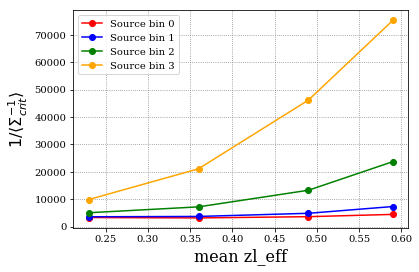

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()

colors = ['red','blue','green','orange']
plt.plot(zvals, 1. / vals3, color=colors[0], marker="o",label='Source bin 0' )
plt.plot(zvals, 1. / vals2, color=colors[1], marker="o",label='Source bin 1' )
plt.plot(zvals, 1. / vals1, color=colors[2], marker="o",label='Source bin 2')
plt.plot(zvals, 1. / vals0, color=colors[3], marker="o",label='Source bin 3' )
plt.legend()
plt.grid(ls=":", color="gray")
plt.xlabel("mean zl_eff", fontsize=16)
plt.ylabel("$1 / \langle \Sigma_{crit}^{-1} \\rangle$", fontsize=16)
fig.savefig("Sigma_crit_inv.png", bbox_inches="tight")

In [95]:
Dl = cosmo.angular_diameter_distance(0.23).to(u.pc)
Dl

<Quantity 7.57880547e+08 pc>

In [97]:
Dl/(10^6)

86466158.26875183

here
here


IOError: /global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l2_s4/mean_JK_gt_boosted not found.

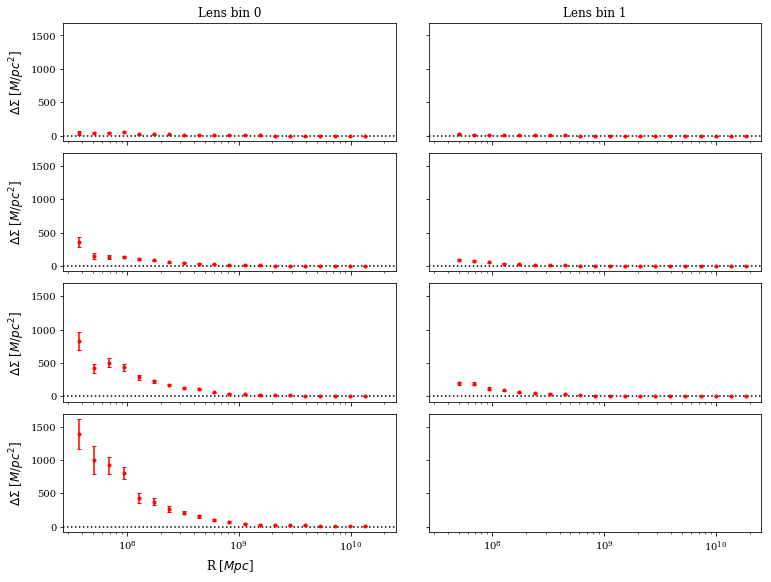

In [102]:
# read in the gt corrected, for each lens bin (2, later 4) and from each source bin. Plot. 

plt.rc("text", usetex=False)
plt.rc("font", family="serif")
#cmap = viridis
nlens=2
nsource=4

fig, ax = plt.subplots(4,2,figsize=(12.5, 9.375),sharey=True,sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
c1 = 'red'
zl=[0.23, 0.36, 0.49,0.59]

for l in range(0, nlens):
    for s in range(nsource):

        path = "/global/cscratch1/sd/aamon/xcorr/runs_LOWZ/measurement/l%d_s%d/" % (l+1,s+1)
        
        sigcritinv=scinvs[s][l]
        Dl = cosmo.angular_diameter_distance(zl[l]).to(u.pc).value
        th, gt_boosted, err_gt_boosted = np.loadtxt(path +"mean_JK_gt_boosted", unpack=True)
        ax[s][l].axhline(y=0, ls=":", color="k", alpha=1)
        ax[s][l].errorbar(th*Dl/(10^6), gt_boosted/sigcritinv, err_gt_boosted/sigcritinv, fmt=".", color=c1, mec=c1, capsize=2)
        ax[s][l].set_xscale("log")
        ax[s][l].axvspan(0., 0.1, color="lightgray")
        #ax[s][l].set_xlim(0,250)
        #ax[s][l].set_ylim(-0.001,0.015)
        #ax[s][l].xaxis.set_major_formatter(plt.ticker.FormatStrFormatter("$%0.0f$"))
        #ax[s][l].tick_params(axis="both", which="major", labelsize="larger")
        #ax[s][l].tick_params(axis="both", which="minor", labelsize="larger")

        if s == 3:
            ax[s][l].set_xlabel("R [$Mpc$]", size="larger")
        if l == 0:
            ax[s][l].set_ylabel(r"$\Delta\Sigma$ [$M / pc^2$]",size="larger",linespacing=3,)
        if s == 0:
            ax[s][l].set_title("Lens bin %d" %l, size="larger")
            print("here")
plt.savefig('DS.pdf')
plt.show()

In [ ]:
# Combine DS
#weight by inverse variance error and try that weighted by sigma crit inv

In [ ]:
# Calculate DS for each Nz 

In [ ]:
# Impact of z error vs m error

In [ ]:
# Impact of z shape vs deltaz

In [ ]:
# Boosts normal way vs pz way

In [ ]:
# Load N(z)'s and corrects the mean using Cosmos calibration.
#zl, nzl, zs, nzsl, nzsh = self.load_nzs(size_snr)
zl, nzl = np.loadtxt(self.paths['hist_n_of_z_lenses_witherr_size'], unpack=True, usecols=(0, 1))
zs, nzsl = np.loadtxt(self.paths['hist_n_of_z_low_size'], unpack=True, usecols=(0,1))
zs, nzsh = np.loadtxt(self.paths['hist_n_of_z_high_size'], unpack=True, usecols=(0,1))
nzsl = interpolate.interp1d(zs + self.source_nofz_pars['dzs', size_snr][0], nzsl, bounds_error=False,
                            fill_value=0)(zs)
nzsh = interpolate.interp1d(zs + self.source_nofz_pars['dzs', size_snr][1], nzsh, bounds_error=False,
                            fill_value=0)(zs)
# Computing inverse sigma_crit for the splits
isch = functions.inv_sigma_crit_eff(zl, zs, nzl, nzsh)

In [ ]:
def inv_sigma_crit_eff(zlbin, zsbin, nzl, nzs, omegam = 0.3):
    '''
    Returns the inverse sigma_crit effective given a lens and source N(z)'s
    '''
    dzl = zlbin[1]-zlbin[0] 
    dzs = zsbin[1]-zsbin[0]
    norml = np.sum(nzl*dzl)
    norms = np.sum(nzs*dzs)
    nzl = nzl/norml
    nzs = nzs/norms
    isc = 0.
    norm = 0.

    # Define meshgrid for redshifts and for Nzs
    X,Y = np.meshgrid(zlbin, zsbin)
    NZL, NZS = np.meshgrid(nzl, nzs)
    # Construct 2-D integrand
    c=cosmology.Cosmo(omegam)
    sci_flat = c.sigmacritinv(X,Y)
    sci_re = np.reshape(sci_flat, (len(zsbin),len(zlbin)), order='C')
    integrand = NZL*NZS*sci_re
    # Do a 1-D integral over every row
    I = np.zeros(len(zsbin))
    for i in range(len(zsbin)):
        I[i] = np.trapz(integrand[i,:], zlbin)

    # Then an integral over the result
    F = np.trapz(I, zsbin)

    return F

def angular(z,Om,Ol):

    # Important constants
    c = const.c.value # Speed of light (in m/s)
    Hdim = h*1e-1
    # dimension of H (H = h*100 km/s/Mpc = h*100*1e3m/s/1e6pc = h*0.1 m/s/pc)

    n = 1000.

    integral = 0
    for zp in arange(0.,z,z/n):
        insint = 1/(Om*(1+zp)**3 + Ol)**0.5
        integral = integral + insint
    integral = integral*(z/n)

    Da = (c/Hdim)*1/(1+z)*integral

    return Da